In [2]:
import pandas as pd
import sys, os
basedir = "../data/processed"
df = pd.read_csv(os.path.join(basedir,"nyctaxiclean.csv"), dtype={"store_and_fwd_flag": "object"})

/Users/tdm/git/capstone/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Unnamed: 0,medallion,hack_license,vendor_id_x,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,...,dropoff_longitude,dropoff_latitude,vendor_id_y,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,...,-73.976273,40.785648,CMT,CRD,11.0,1.0,0.5,2.50,0.00,15.00
1,1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,...,0.000000,0.000000,CMT,CRD,8.5,0.0,0.5,1.80,0.00,10.80
2,2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,...,-74.009186,40.715374,CMT,CRD,16.5,1.0,0.5,3.60,0.00,21.60
3,3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,...,-73.955666,40.776642,CMT,CRD,10.0,1.0,0.5,3.45,0.00,14.95
4,4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,...,-73.961662,40.761082,CMT,CRD,15.0,0.5,0.5,3.20,0.00,19.20
5,5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,N,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,...,-73.990776,40.747997,CMT,CRD,4.5,0.5,0.5,1.10,0.00,6.60
6,6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,1,N,2013-04-05 06:16:10,2013-04-05 06:22:05,1,354,...,-73.978867,40.751144,CMT,CRD,6.5,0.0,0.5,1.00,0.00,8.00
7,7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,1,N,2013-04-05 06:20:10,2013-04-05 06:27:43,1,452,...,-74.002747,40.756168,CMT,CRD,8.0,0.0,0.5,2.10,0.00,10.60
8,8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,1,N,2013-04-04 19:20:16,2013-04-04 19:30:52,1,635,...,-73.984566,40.759415,CMT,CRD,7.5,1.0,0.5,2.25,0.00,11.25
9,9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,1,N,2013-04-03 18:05:38,2013-04-03 18:23:06,1,1048,...,-73.988472,40.756004,CMT,CRD,12.5,1.0,0.5,2.80,0.00,16.80


# 1. What is the distribution of number of passengers per trip?

Text(0.5,1,'Histogram of passenger number density')

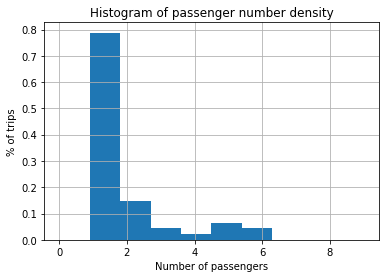

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(column="passenger_count", density=True)
plt.xlabel("Number of passengers")
plt.ylabel("% of trips")
plt.title("Histogram of passenger number density")

In [28]:
# min is 0? max is nine... examine the outliers
primary_key = ["medallion", "hack_license", "pickup_datetime"]
passenger_counts = df.groupby(["passenger_count"]).count()
passenger_counts

,Unnamed: 0,medallion,hack_license,vendor_id_x,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,vendor_id_y,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
passenger_count,,,,,,,,,,,,,,,,,,,,,
0,229,229,229,229,229,46,229,229,229,229,...,83,83,229,229,229,229,229,229,229,229
1,10707975,10707975,10707975,10707975,10707975,6112968,10707975,10707975,10707975,10707975,...,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975,10707975
2,1985916,1985916,1985916,1985916,1985916,1056614,1985916,1985916,1985916,1985916,...,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916,1985916
3,609900,609900,609900,609900,609900,267654,609900,609900,609900,609900,...,609900,609900,609900,609900,609900,609900,609900,609900,609900,609900
4,298178,298178,298178,298178,298178,140523,298178,298178,298178,298178,...,298178,298178,298178,298178,298178,298178,298178,298178,298178,298178
5,890196,890196,890196,890196,890196,4091,890196,890196,890196,890196,...,890196,890196,890196,890196,890196,890196,890196,890196,890196,890196
6,609376,609376,609376,609376,609376,164,609376,609376,609376,609376,...,609376,609376,609376,609376,609376,609376,609376,609376,609376,609376
8,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
#dig in to the zero passenger trips
df[df["passenger_count"]==0].describe()

#seems to be incomplete data - also time, distance, and in some cases latitude and longitude missing for these trips

,Unnamed: 0,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,2.290000e+02,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,83.000000,83.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,7.311074e+06,1.611354,0.0,175.834061,1.545939,-65.248092,35.939821,-52.598645,28.971007,28.003930,0.015284,0.026201,1.387686,0.781921,30.215022
std,2.815684e+06,2.296460,0.0,643.958821,4.937045,23.907089,13.168442,33.751169,18.589908,27.059704,0.098152,0.111662,3.880806,2.489266,30.006590
min,5.673160e+05,0.000000,0.0,0.000000,0.000000,-74.211456,0.000000,-74.269783,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,5.828475e+06,0.000000,0.0,0.000000,0.000000,-73.994034,40.717377,-74.029786,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,7.385345e+06,0.000000,0.0,0.000000,0.000000,-73.981285,40.742367,-73.977348,40.729122,15.000000,0.000000,0.000000,0.000000,0.000000,15.500000
75%,7.664709e+06,5.000000,0.0,0.000000,0.000000,-73.952133,40.759380,0.000000,40.758122,42.330000,0.000000,0.000000,0.000000,0.000000,43.830000
max,1.476040e+07,5.000000,0.0,5700.000000,28.800000,0.000000,41.082272,0.000000,41.082256,207.000000,1.000000,0.500000,29.250000,10.250000,207.000000


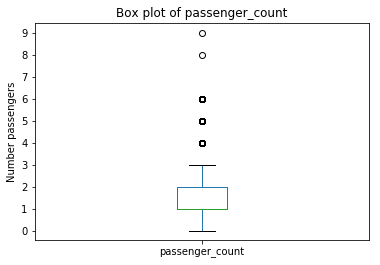

In [43]:
ax = df["passenger_count"].plot.box()
plt.ylabel("Number passengers")
plt.title("Box plot of passenger_count")
ticks = ax.set_yticks(range(10))

# 2. What is the distribution of fare amount? 

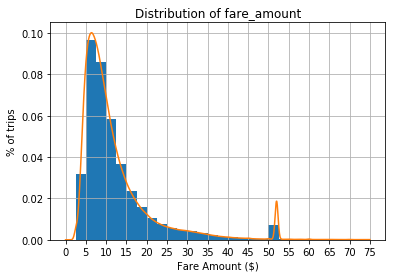

In [25]:
from scipy import stats
import numpy as np
ax = df["fare_amount"].hist(density=True, bins=30, range=(0,75))
ax.set_title("Distribution of fare_amount")
ax.set_ylabel("% of trips")
ax.set_xlabel("Fare Amount ($)")
ax.set_xticks(range(0,100,5))
kde = stats.gaussian_kde(df["fare_amount"])

xx = np.linspace(0, 75, 1000)

ax.plot(xx, kde(xx))

Text(0,0.5,'Frequency of fare amount values')

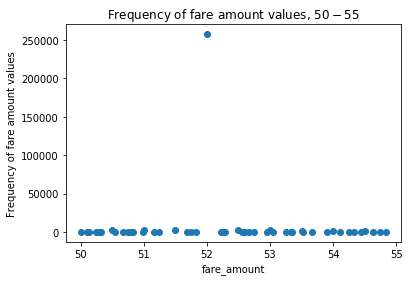

In [53]:
ax = df[(df["fare_amount"] > 50) & (df["fare_amount"] < 55)].groupby("fare_amount").count()["medallion"].plot(style="o")
ax.set_title("Frequency of fare amount values, $50-$55")
ax.set_ylabel("Frequency of fare amount values")

In [77]:
#~70 meters, 3 decimal places of a degree at 40deg north
aggdf = df[df["fare_amount"] == 52.0].round(3).groupby(["pickup_longitude", "pickup_latitude"]).count().reset_index().sort_values("medallion")
aggdf = aggdf[aggdf["medallion"] > 1]

In [79]:
import dash
import dash_core_components as dcc
from plotly.graph_objs import *

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

app = dash.Dash()
data = [dict(
        type = 'scattermapbox',
        lon = aggdf['pickup_longitude'],
        lat = aggdf['pickup_latitude'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = colorscale,
            cmin = 0,
            color = aggdf['medallion'],
            cmax = aggdf['medallion'].max(),
            colorbar=dict(
                title="Number of pickups"
            )
        ))]

app.layout = dcc.Graph(
    id = "mapbox",
    
    figure={
        "data": data,
        "layout": dict(
            hovermode = "closest",
            margin = dict(l = 0, r = 0, t = 0, b = 0),
            mapbox = dict(
                accesstoken = "pk.eyJ1IjoiZGVzdWx0aXIiLCJhIjoiY2pmZDN4M2FlMTEzYjJ3bWlyc2VhaDkxaiJ9.VvezwDLTQlh2GVAEsauwlg",
                bearing = 0,
                center = dict(lat=aggdf["pickup_latitude"].iloc[-1], lon=aggdf["pickup_longitude"].iloc[-1]),
                style = "light",
                pitch = 0,
                zoom = 6.0,
            )
        )
    },
    style = {"height": 750}
)

app.run_server()

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Apr/2018 11:43:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Apr/2018 11:43:05] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/Apr/2018 11:43:05] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [30/Apr/2018 11:43:05] "GET /favicon.ico HTTP/1.1" 200 -


Text(0.5,1,'Box plot of fare_amount')

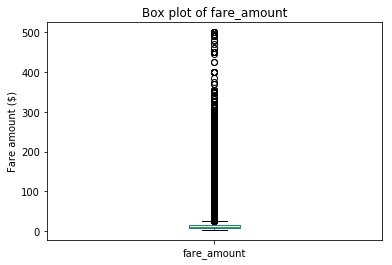

In [26]:
ax = df["fare_amount"].plot.box()
plt.ylabel("Fare amount ($)")
plt.title("Box plot of fare_amount")

In [ ]:
#TODO load the neighbourhood file and find best pickup neighbourhoods

# 3. What is the distribution of tip amount?

In [84]:
df.groupby("tip_amount").count()

,Unnamed: 0,medallion,hack_license,vendor_id_x,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,...,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id_y,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount
tip_amount,,,,,,,,,,,,,,,,,,,,,
0.00,7220943,7220943,7220943,7220943,7220943,3642241,7220943,7220943,7220943,7220943,...,7220943,7220799,7220799,7220943,7220943,7220943,7220943,7220943,7220943,7220943
0.01,3797,3797,3797,3797,3797,2566,3797,3797,3797,3797,...,3797,3797,3797,3797,3797,3797,3797,3797,3797,3797
0.02,1230,1230,1230,1230,1230,772,1230,1230,1230,1230,...,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
0.03,449,449,449,449,449,271,449,449,449,449,...,449,449,449,449,449,449,449,449,449,449
0.04,220,220,220,220,220,136,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220
0.05,927,927,927,927,927,626,927,927,927,927,...,927,927,927,927,927,927,927,927,927,927
0.06,225,225,225,225,225,117,225,225,225,225,...,225,225,225,225,225,225,225,225,225,225
0.07,215,215,215,215,215,140,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
0.08,825,825,825,825,825,599,825,825,825,825,...,825,825,825,825,825,825,825,825,825,825


In [ ]:
from scipy import stats
import numpy as np
#remove zeroes
tipdf = df[df["tip_amount"] > 0]
ax = tipdf["tip_amount"].hist(density=True, bins=[0,5,10,15,20,25,30])
ax.set_title("Distribution of tip_amount")
ax.set_ylabel("% of trips")
ax.set_xlabel("Tip Amount ($)")
kde = stats.gaussian_kde(tipdf["tip_amount"])

xx = np.linspace(0, 30, 1000)

ax.plot(xx, kde(xx))

#TODO load the neighbourhood file and find best pickup neighbourhoods